### İsmail Ata İnan
### 2017400129

# Assignment 1 Answers

## Question 1

The Gram-Schmidt algorithm allows us to get an orthonormal collection of vectors from a vector that has linearly independent columns. If the columns of the given matrix is linearly dependent, then we can not generate a set of orthonormal vectors that has the size equal to the number of columns in the given matrix.

Call the given matrix $A$ with dimensions $nxk$ and columns $a_1, a_2, .., a_k$ and the resulting $nxk$ matrix $Q$ with orthonormal columns $q_1, .., q_k$. One by one, we iterate through the columns of A. The idea is that, to create a new vector $q_j$ with $a_j$, we need to subtract all the components of $q_1, .., q_(j-1)$ from $a_j$. We call te result $\tilde{q}_j$. So we do $\tilde{q}_j = a_j - (q_1^T a_j)q_1 - .. - (q_{j - 1}^T a_j)q_{j - 1}$. This operation makes sure that $\tilde{q}_j^Tq_z = 0$ for $z = 0, 1, .., j-1$. In other words, $\tilde{q}_j$ is orthogonal to all the vectors we created so far, just as we wanted. Then we check whether $\tilde{q}_j = 0$ or not. If it is $0$ vector, this means that the column $a_j$ has no ability to give us new dimension. That is to say, $a_j$ is linearly dependent with set of vectors $a_1, a_2, .., a_(j-1)$. We finish the algorithm if it is linearly dependent. If it is not, we can use $\tilde{q}_j$ in our result matrix Q. But to be orthonormal, we need to have $||q_j|| = 1$. Therefore, we get this by setting $q_j = \dfrac{\tilde{q}_j}{||\tilde{q}_j||}$. After doing this operation for each column of $A$, we get the orthonormal set of vectors $q_1, .., q_k$ and use them as columns of $Q$.

Below is the implementation of the Gram-Schmidt algorithm.

In [1]:
import numpy as np

# This function is inspired from Python Language Companion, Section 5.4, Gram Schmidt Algorithm
def gramSchmidt(A) :
    Q = []
    n = len(A)
    
    # Iterations
    for i in range(n) :
        # Orthogonalization
        q = np.array(A[:,i], dtype=float)
        for j in range(i) :
            q -= (Q[j] @ A[:,i]) * Q[j]
        
        # Test if the independency is preserved
        indep = False
        for j in range(n) :
            ## Specifying an interval for the equality with 0
            if (abs(q[j] > 10**(-15))) :
                indep = True
        
        if not indep :
            print("A is linearly dependent!")
            return np.array(Q).T
        else :
            # Normalization
            q /= np.sqrt(sum(np.square(q)))
            Q.append(q)
    
    return np.array(Q).T 

#### Generation of 5x5 matrix X

Now we generate a $5x5$ matrix $X$ to test our algorithm on it. To fill its entries, we generate a random number from unit Gaussion distribution. Below the entries of $X$ can be seen.

In [2]:
# Generation of X
X = np.array([[np.random.normal() for j in range(5)] for i in range(5)])
X

array([[ 0.05100629, -1.32855271,  0.16045561, -1.82225819, -0.06420436],
       [-0.810629  ,  0.9183414 , -0.40260524, -0.66938044, -1.54127708],
       [-0.49805654,  0.2122388 , -0.24065067,  1.60116094,  0.29093575],
       [ 0.22975983,  0.81319571,  0.19746791, -0.7911485 ,  0.72279184],
       [-0.66574518, -0.64782265, -0.53839841, -0.75697162, -2.78088781]])

#### QR factorization

Using our knowledge from Gram-Schmidt algorithm, we try to express the relation between $A$ and $Q$ in a matrix notation. Suppose $A$ and $Q$ is defined as above and also $A$ has linearly independent columns so that the algorithm is successful. We can invert the orthonolization stage at the Gram-Schmidt algorithm to express each column of $A$ as a linear combination of columns of $Q$. Below is the formula for this operation :
$a_j = (q_1^T a_j)q_1 + .... + (q_{j - 1}^T a_j)q_{j - 1} + ||\tilde{q_j}|| q_j$
Notice that coefficients of $q_i$, $i = 1, 2, .., j - 1$ are actually scalars since they are inner products. Also, the norm of $q_j$ at the end is also a scalar. Then we can define $R_{ij}s$ as coefficents that satisfy the above equation like this :
$a_j = R_{1j} q_1 + .... + R_{jj} q_j$
with $R_{ij} = q_i^T a_j$ for $i < j$, $R_{ii} = ||\tilde{q_i}||$ and $R_{ij} = 0$ for $j < i$. Then we clearly get $A = QR$.

Looking from another aspect, if we have $A = QR$, then $R = Q^{-1}A$. Since $Q$ has orthonormal columns, if we multiply $Q$ with $Q^T$, then only entries that are nonzero are generated with the inner products $q_i^T q_i$. All other inner product are 0 since the vectors are mutually orthonogal. And we also know $q_i^T q_i = 1$ since the norm of these vectors are $1$. Then we get the expression $Q^T Q = I$. Clearly from this statement, $Q^T = Q^{-1}$. Then we get $R = Q^T A$.

For $QR$ factorization, we get $Q$ by calling Gram-Schmidt algorithm above and we obtain $R$ by the equality $R = Q^T A$.

In [3]:
# QR factorization
def qrFactorization(A) :
    Q = gramSchmidt(A)
    R = np.array(Q).T @ A
    return Q, R

In [4]:
# QR factorization of X
Q, R = qrFactorization(X)

#### The Results
$Q$

In [5]:
Q

array([[ 0.04304999, -0.68777638,  0.67908079, -0.23872992,  0.08347242],
       [-0.68418168,  0.38898629,  0.36619197, -0.33158677, -0.3695115 ],
       [-0.42036636,  0.05526493,  0.28072767,  0.72561712,  0.46358351],
       [ 0.19392036,  0.45007274,  0.19524458, -0.45558053,  0.71704627],
       [-0.56189781, -0.41235133, -0.53649255, -0.31461788,  0.35697139]])

#### $Q \ Q^T$

The diagonal entries are 1, sharp. Other entries are floating numbers that have absolute values lower than $10^{-15}$. They should supposed to be 0 but this difference are caused by the precision of floating points in the computations. Then we can say that this matrix is $5x5$ identity matrix which is the correct result.

In [6]:
Q @ Q.T

array([[ 1.00000000e+00,  3.77030590e-16, -4.81983359e-16,
        -5.92728654e-16, -3.75168673e-16],
       [ 3.77030590e-16,  1.00000000e+00,  4.85617930e-16,
        -3.87691648e-16, -1.55700203e-16],
       [-4.81983359e-16,  4.85617930e-16,  1.00000000e+00,
        -7.03058446e-16, -3.47435059e-16],
       [-5.92728654e-16, -3.87691648e-16, -7.03058446e-16,
         1.00000000e+00,  5.90539763e-16],
       [-3.75168673e-16, -1.55700203e-16, -3.47435059e-16,
         5.90539763e-16,  1.00000000e+00]])

$R$

The entries $R_{ij}$ with $i > j$ are floating numbers that have absolute values lower than $10^{-15}$. They should supposed to be 0 but this difference are caused by the precision of floating points in the computations. Then we clearly see that $R$ is an upper triangular matrix which is the correct result.

In [7]:
R

array([[ 1.18481541e+00, -2.53019258e-01,  7.24342121e-01,
        -2.16236640e-02,  2.63218876e+00],
       [ 1.85560145e-17,  1.91582651e+00,  3.06191821e-02,
         1.03747827e+00,  9.32712832e-01],
       [-1.21435008e-16, -2.00039489e-16,  2.21375484e-01,
        -7.81449929e-01,  1.10671725e+00],
       [-2.31645764e-16,  1.01489262e-16, -8.78900620e-17,
         2.41740371e+00,  1.28312969e+00],
       [ 6.19023162e-16,  1.10732583e-15,  1.18433293e-16,
        -1.05170808e-15,  2.24611148e-01]])

$QR - X$

All entries are floating numbers that have absolute values lower than $10^{-15}$. They should supposed to be 0 but this difference are caused by the precision of floating points in the computations. So we conclude that this matrix is a $5x5$ $0$ matrix, which is the correct result.

In [8]:
Q @ R - X

array([[ 6.93889390e-18,  0.00000000e+00,  5.55111512e-17,
        -2.22044605e-16, -1.11022302e-16],
       [-1.11022302e-16, -4.44089210e-16, -1.11022302e-16,
         5.55111512e-16, -2.22044605e-16],
       [ 5.55111512e-17,  6.10622664e-16, -5.55111512e-17,
         2.22044605e-16, -6.66133815e-16],
       [ 5.27355937e-16,  7.77156117e-16,  1.38777878e-16,
        -1.11022302e-15, -2.22044605e-16],
       [ 4.44089210e-16,  6.66133815e-16, -1.11022302e-16,
        -4.44089210e-16,  0.00000000e+00]])

## Question 2

First column of $Y$ : $(1,2)$
Second column of $Y$ : $(-4,1)$

The black point is the origin. The red vector represents $(1,2)$ and the blue one represents $(-4,1)$.

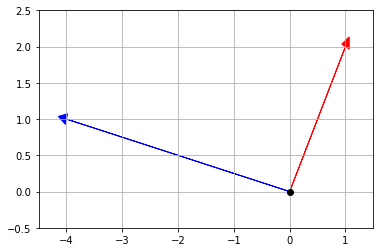

In [9]:
import matplotlib.pyplot as plt

# Y matrix in the question
Y = np.array([[1,-4], [2,1]])

fig, ax = plt.subplots()

# First column (1,2) as a vector
ax.arrow(0,0,Y[0,0],Y[1,0],head_width=0.15,head_length=0.15,color = 'r')
# Second column (-4, 1) as a vector
ax.arrow(0,0,Y[0,1],Y[1,1],head_width=0.15,head_length=0.15,color = 'b')

# Origin point
plt.plot(0,0,'ok')
plt.xlim(-4.5, 1.5)
plt.ylim(-0.5, 2.5)
plt.grid(b=True, which='major')
plt.show()

#### QR Decomposition

Using the **qrFactorization** function we defined in Question 1 directly, we obtain $Q$ and $R$ decompositions for $Y$. Resulting $Q$ and $R$ can be seen below.

In [10]:
Q, R = qrFactorization(Y)

In [11]:
Q

array([[ 0.4472136 , -0.89442719],
       [ 0.89442719,  0.4472136 ]])

In [12]:
R

array([[ 2.23606798e+00, -8.94427191e-01],
       [-1.11022302e-16,  4.02492236e+00]])

This time, columns of $Q$ is plotted in the graph. Black point is again the origin. The red vector represents the first column and the blue one represents the second column of $Q$. As can be guessed from the figure, the vectors are orthogonal.

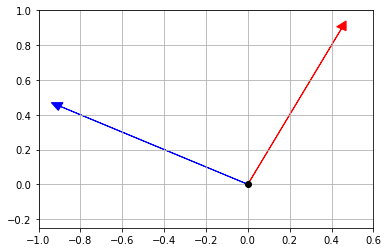

In [13]:
fig, ax = plt.subplots()

ax.arrow(0,0,Q[0,0],Q[1,0],head_width=0.05,head_length=0.05,color = 'r')
ax.arrow(0,0,Q[0,1],Q[1,1],head_width=0.05,head_length=0.05,color = 'b')

plt.plot(0,0,'ok')
plt.xlim(-1, 0.6)
plt.ylim(-0.25, 1)
plt.grid(b=True, which='major')
plt.show()

## Question 3

First we create the Hilbert matrix $H$. As in the formula in the question, the entries of Hilbert matrix is only dependent on the row and column of the entry. So we can create $H$ using a nested for loop with the formula $H_{ij} = \dfrac{1}{i + j - 1}$. The indexes in the code start from 1 to ensure integrity with the formula. $X$ is formed directly using the formula $X = 10^{*5}I + H$.

In [14]:
H = np.array([[1 / (i + j - 1) for j in range(1, 201)] for i in range(1, 201)])
X = (10**-5) * np.identity(200) + H
X

array([[1.00001   , 0.5       , 0.33333333, ..., 0.00505051, 0.00502513,
        0.005     ],
       [0.5       , 0.33334333, 0.25      , ..., 0.00502513, 0.005     ,
        0.00497512],
       [0.33333333, 0.25      , 0.20001   , ..., 0.005     , 0.00497512,
        0.0049505 ],
       ...,
       [0.00505051, 0.00502513, 0.005     , ..., 0.00254165, 0.00252525,
        0.00251889],
       [0.00502513, 0.005     , 0.00497512, ..., 0.00252525, 0.00252889,
        0.00251256],
       [0.005     , 0.00497512, 0.0049505 , ..., 0.00251889, 0.00251256,
        0.00251627]])

### a.

For QR decomposition, **qrFactorization** function we implemented in Question 1 is called directly. Resulting vector with orthonormal is named $Q1$ and the upper triangular matrix is named $R1$. Their entries can be seen below. 

In [15]:
Q1, R1 = qrFactorization(X)
Q1

array([[ 7.80884583e-01, -5.60666336e-01,  2.53027291e-01, ...,
        -1.31011187e-05, -1.29535110e-05, -1.28027119e-05],
       [ 3.90438387e-01,  1.57426118e-01, -5.67513334e-01, ...,
         2.18888621e-04,  2.13635718e-04,  2.08404190e-04],
       [ 2.60292258e-01,  2.50812673e-01, -3.60656439e-01, ...,
        -4.52904686e-04, -4.27869056e-04, -4.03257475e-04],
       ...,
       [ 3.94382209e-03,  1.02985712e-02,  1.69341181e-02, ...,
         9.79786276e-01, -4.56277758e-02, -4.41647918e-02],
       [ 3.92400389e-03,  1.02474827e-02,  1.68534961e-02, ...,
         6.46523942e-03,  9.80170577e-01, -4.51012732e-02],
       [ 3.90438387e-03,  1.01968985e-02,  1.67736367e-02, ...,
         6.75847709e-03,  6.69679601e-03,  9.80553018e-01]])

In [16]:
R1

array([[ 1.28061179e+00,  7.76999624e-01,  5.81787443e-01, ...,
         2.05271309e-02,  2.04334677e-02,  2.03406710e-02],
       [-3.01023541e-17,  1.90393145e-01,  2.25879353e-01, ...,
         2.83370132e-02,  2.82178400e-02,  2.80996895e-02],
       [ 9.32414151e-15,  8.11142055e-15,  2.23985233e-02, ...,
         2.55515342e-02,  2.54556308e-02,  2.53604586e-02],
       ...,
       [-2.69578084e-13, -1.48458126e-13, -9.06611425e-14, ...,
         1.02692545e-05,  5.45787568e-07,  5.58489278e-07],
       [ 7.98510294e-13,  3.84053360e-13,  2.47883354e-13, ...,
         9.49183819e-11,  1.02676320e-05,  5.42474313e-07],
       [-5.74727439e-14, -9.09641332e-14, -7.92573355e-14, ...,
         9.21234839e-11,  9.41357431e-11,  1.02660312e-05]])

### b. Modified Gram Schmidt

Here, we implement the algorithm given at the bottom of the **Assignment 1**. The code is pretty much the same with the pseudocode of the algorithm. This version of Gram Schmidt algorithm also provides upper triangular $R$ matrix along with $Q$, so it does all the $QR$ factorization.

In [17]:
def modGramSchmidt(A) :
    n = len(A)
    V = A
    # upper triangular R matrix
    R = np.zeros((n,n))
    # Q matrix with orthonormal columns
    Q = []
    
    for i in range(n) :
        # sets the diagonal entries of R to be the norm of the orthogonalized column of A
        R[i][i] = np.sqrt(sum(np.square(V[:,i])))
        # current column of V is normalized to become a column of Q, it is orthonoal to all the previous
        # columns of Q because of the procedure done below at the previous iteration
        q = V[:,i] / R[i][i]
        Q.append(q)
        
        for j in range(i + 1, n) :
            # sets the entries of R upper from the diagonal by the nonintuitive but correct inner product of
            # current column of Q with all the columns of V that will be iterated in the future
            R[i][j] = q @ V[:,j]
            # the columns of V that will be iterated in the future are made orthonogal already to the all
            # previous columns
            V[:,j] -= R[i][j] * q
    
    return np.array(Q).T, R

Here, modified Gram Schmidt algorithm is used on the previously generated matrix $X$. The results $Q2$ correspond to the matrix with orthonormal columns and $R2$ correspond to the upper triangular matrix. They can be seen below.

In [18]:
Q2, R2 = modGramSchmidt(X)

In [19]:
Q2

array([[ 7.80884583e-01, -5.60666336e-01,  2.53027291e-01, ...,
        -1.49125628e-05, -1.47463676e-05, -1.45765800e-05],
       [ 3.90438387e-01,  1.57426118e-01, -5.67513334e-01, ...,
         2.63875051e-04,  2.58218834e-04,  2.52572966e-04],
       [ 2.60292258e-01,  2.50812673e-01, -3.60656439e-01, ...,
        -6.23328939e-04, -5.96950651e-04, -5.70951160e-04],
       ...,
       [ 3.94382209e-03,  1.02985712e-02,  1.69341181e-02, ...,
         9.79880682e-01, -4.56383096e-02, -4.41743754e-02],
       [ 3.92400389e-03,  1.02474827e-02,  1.68534961e-02, ...,
         6.48206070e-03,  9.80264994e-01, -4.51114957e-02],
       [ 3.90438387e-03,  1.01968985e-02,  1.67736367e-02, ...,
         6.77590055e-03,  6.71377594e-03,  9.80647352e-01]])

In [20]:
R2

array([[1.28061179e+00, 7.76999624e-01, 5.81787443e-01, ...,
        2.05271309e-02, 2.04334677e-02, 2.03406710e-02],
       [0.00000000e+00, 1.90393145e-01, 2.25879353e-01, ...,
        2.83370132e-02, 2.82178400e-02, 2.80996895e-02],
       [0.00000000e+00, 0.00000000e+00, 2.23985233e-02, ...,
        2.55515342e-02, 2.54556308e-02, 2.53604586e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.02702160e-05, 5.45977920e-07, 5.58690483e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.02685911e-05, 5.42663734e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669871e-05]])

### c. Errors 

Both methods to get $QR$ decompositions are perfect on the theory, but not in the practice because they work on floating point numbers on computers and they can not represent all the real numbers. Therefore, some error is generated in the factorization operations while working with small numbers. At this section, we decide the error to be the largest entry in the error matrix $E = I - Q^Q$. As we stated earlier, $Q^T = Q^{-1}$ so for the ideal case, $E = 0$. We now see how much these methods have deviated from this ideal case. 

Firstly, we inspect our method we learned in the lecture. It is the QR factorization implemented in Question 1.
$Q1$ was the $Q$ that we obtained from that function.

In [21]:
E1 = np.identity(200) - Q1.T @ Q1
err1 = E1.max()
err1

0.3913273098311851

Error is nearly $0.39$ in my Macbook Pro. It is up to change in different environments.

Secondly, we inspect the modified Gram Schmidt algorithm implemented in **b** part of this question. $Q2$ was the $Q$ that we obtained from that function.

In [22]:
E2 = np.identity(200) - Q2.T @ Q2
err2 = E2.max()
err2

1.0529984899916677e-11

This time, error is approximately $10^{-11}$ in my Mcbook Pro. It is clear that the modified version of Gram Schmidt has much better results because the difference in the errors is huge. We can say that modified Gram Schmidt algorithm has far better performance that the one we implemented in Question 1. It is not because the one in Question 1 was wrong, it is because the computations made in the modified version is done with much less floating point precision mistakes. Modified version is better for computers because it firstly makes all columns that are not yet iterated orthogonal to the current column of Q, then they are normalized in their own iteration. This way, precision mistakes that can occur when taking inner product of vectors with small float entries are avoided(not completely, but mostly).

## Question 4

First, we implement the original function in the question named **func**. For Taylor Approximations, since we use them repeatedly, we implement a single function that takes the function, order of approximation and the independent variable as input and returns the taylor approximation at the specific point as output. All this work is done by the function **nthOrderTaylorApp**. To write this function, we use the automatic differentitaion tools provided by **jax** by the function **grad**. Also to avoid confusion for the interpreter, **jax.numpy** is used instead of **numpy** when necessary. We make use of **grad** function since differentiating by hand for 3 times is longer and redundant. Also, **nthOrderTaylorApp** is actually a general function that can be used to do taylor approximations for any order by using **jax**. The approixation is done at the point $x = 0.5$, as stated in the question. The function simply evaluates $func(0.5)$ for 0th order approximation and returns it. For bigger orders, we make use of a temporary function **der** that keeps the $(i+1)$th order derivative for any i in our iterations. In the iterations, we directly evaluate the current order derivative by using **der**, multiply it by $(x - 0.5)^{i + 1}$, and add it to our final approximation.

In [23]:
from jax import grad
import jax.numpy as jnp

# original function f(x)
def func(x) :
    return x**2 + 2 * jnp.exp(x)

# nth order taylor approximation function
# func -> function
# n -> order of the approximation
# x -> the point that the approximation is evaluated
def nthOrderTaylorApp(func, n, x) :
    org = func(0.5)
    der = grad(func)
    
    for i in range(n) :
        org += der(0.5) * (x - 0.5)**(i + 1)
        der = grad(der)
    
    return org

Below is the plotting of the original function and its 0th, 1st, 2nd and 3rd order taylor approximations. The line in **black** represents **f(x)**, the one in **blue** represents **0th order taylor approximation**, the one in **teal** represents **1st order taylor approximation**, the one in **green** represents **2nd order taylor approximation** and the one in **red** represents **3rd order taylor approximation**.

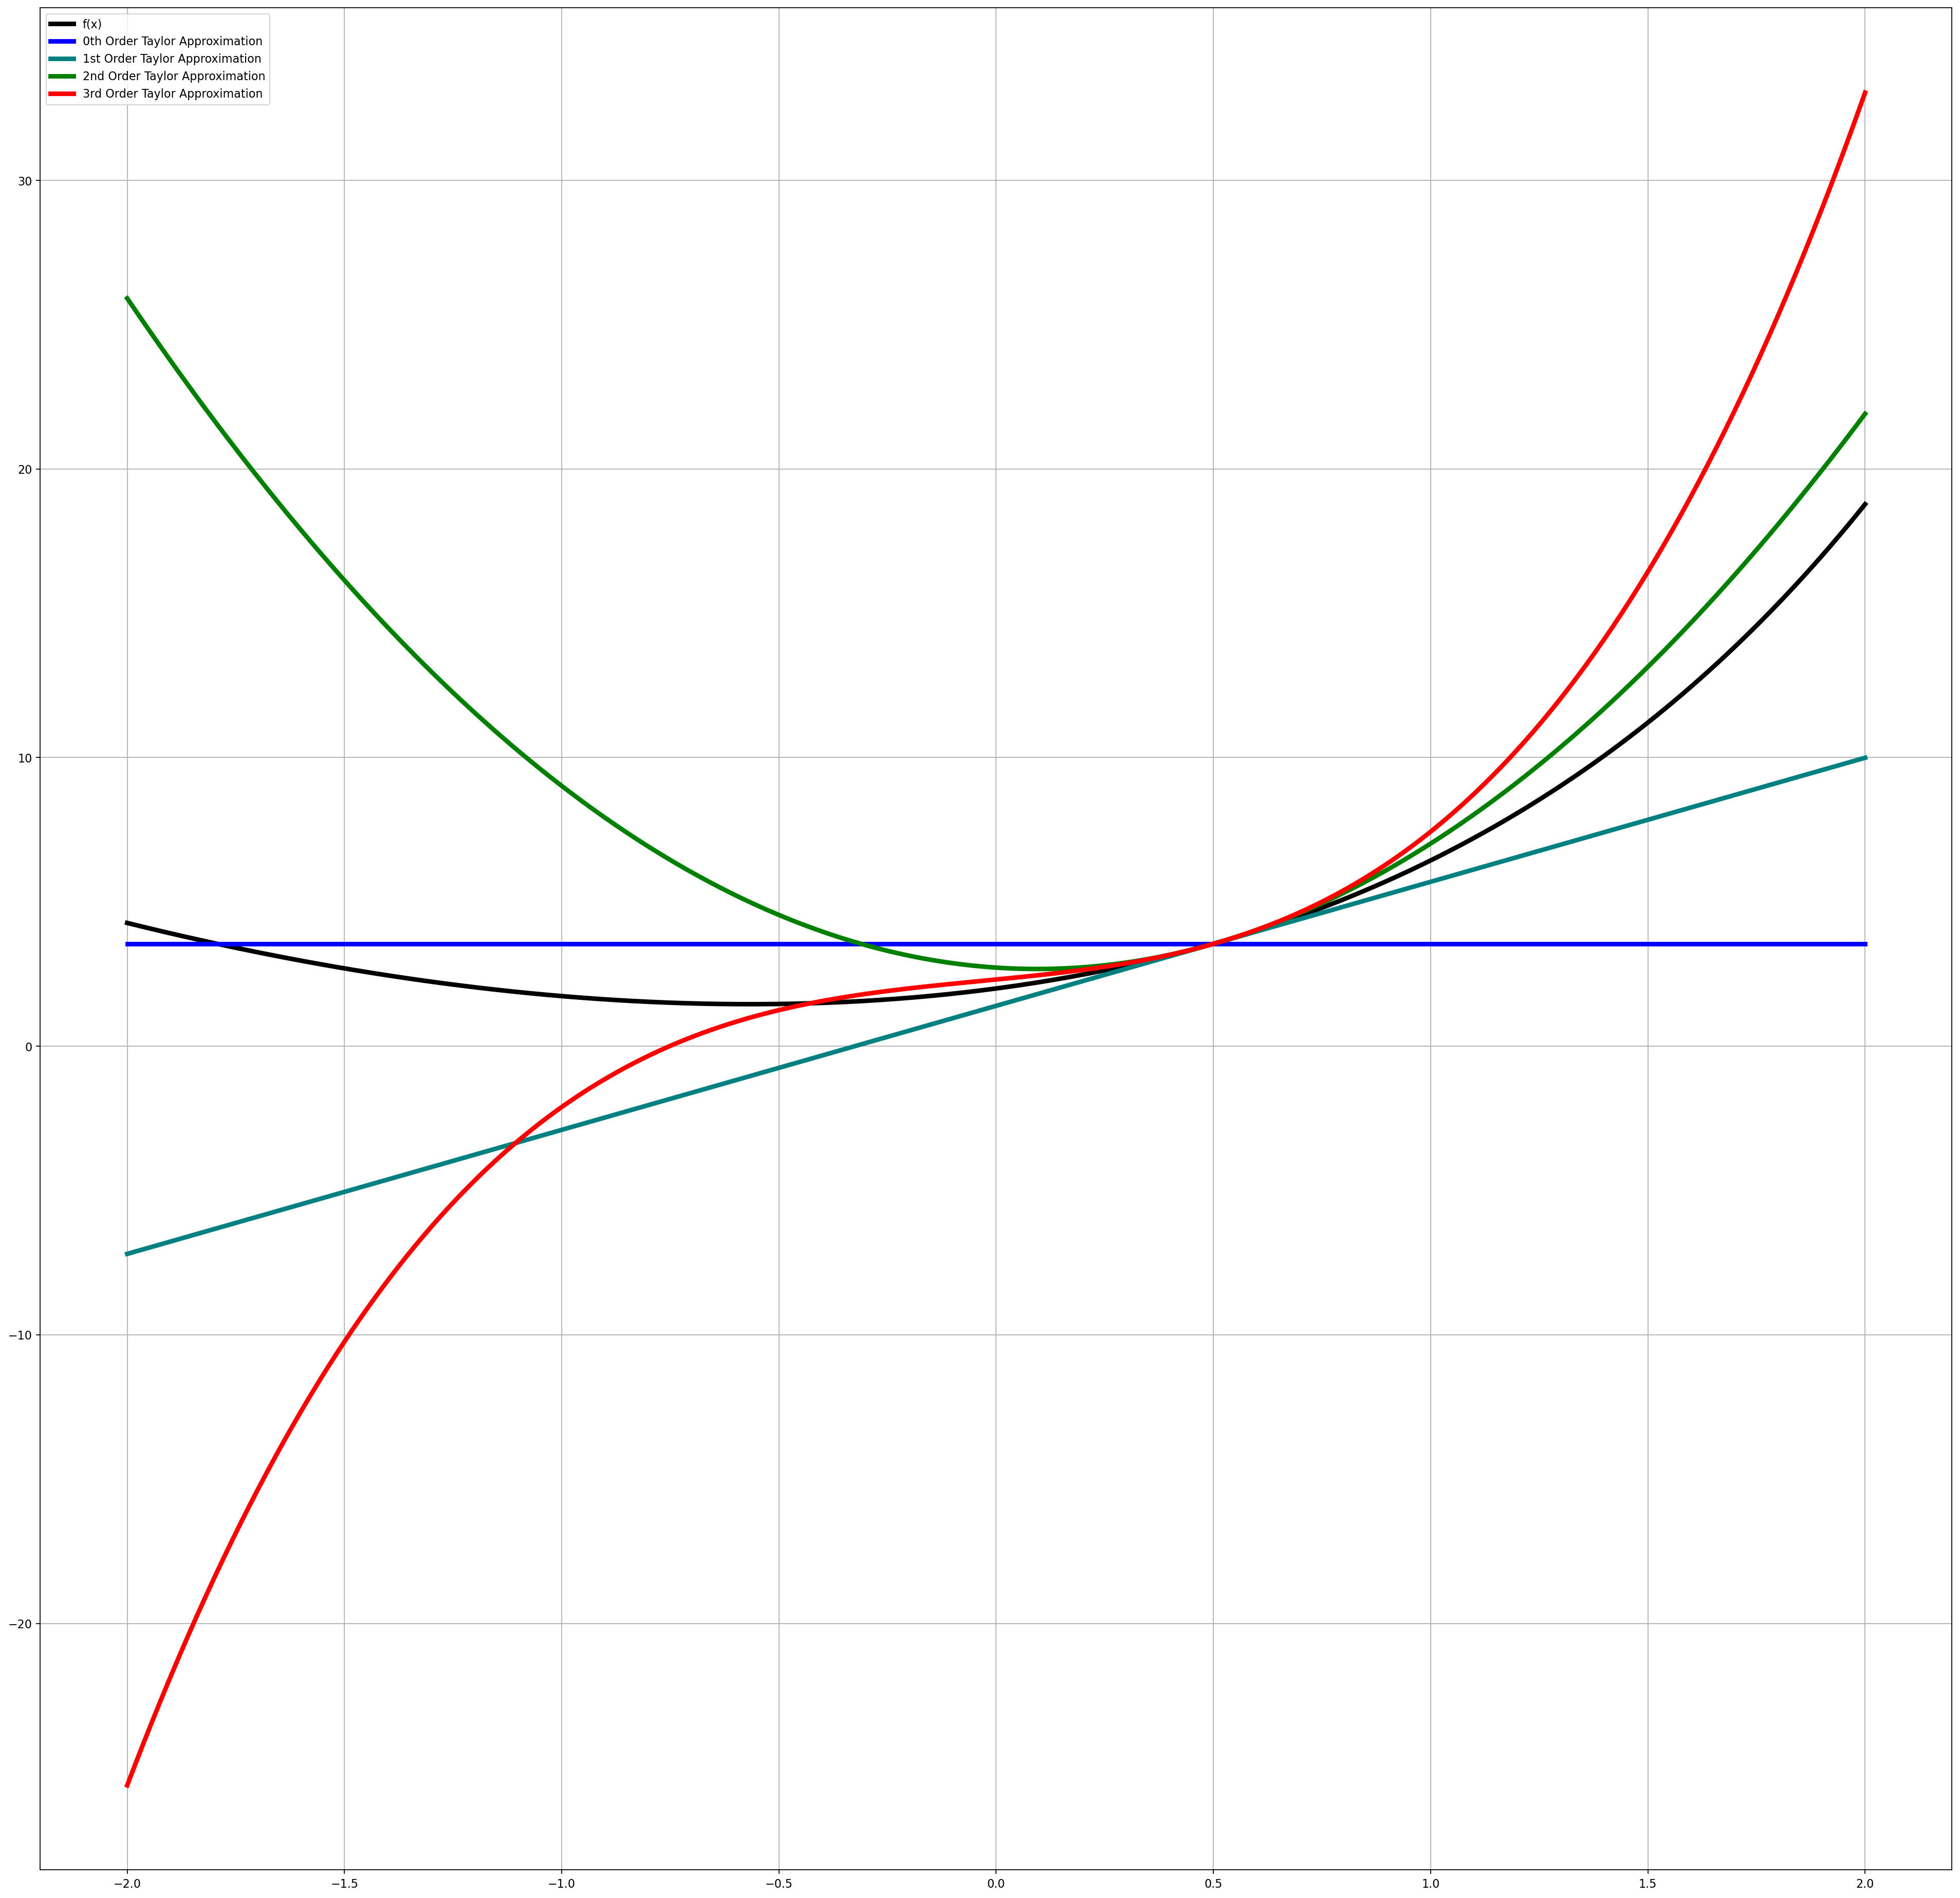

In [24]:
fig, ax = plt.subplots(figsize=(30,30), dpi=160)

x = jnp.linspace(-2, 2, 200)
f = [func(num) for num in x]
ax.plot(x, f, color='black', linewidth=4, markersize=13, label='f(x)')

f0 = [nthOrderTaylorApp(func, 0, num) for num in x]
ax.plot(x, f0, color='blue', linewidth=4, markersize=13, label='0th Order Taylor Approximation')

f1 = [nthOrderTaylorApp(func, 1, num) for num in x]
ax.plot(x, f1, color='teal', linewidth=4, markersize=13, label='1st Order Taylor Approximation')

f2 = [nthOrderTaylorApp(func, 2, num) for num in x]
ax.plot(x, f2, color='green', linewidth=4, markersize=13, label='2nd Order Taylor Approximation')

f3 = [nthOrderTaylorApp(func, 3, num) for num in x]
ax.plot(x, f3, color='red', linewidth=4, markersize=13, label='3rd Order Taylor Approximation')

ax.grid(b=True, which='major')
ax.legend()
plt.show()

## Question 5

We initially have $A + iB = (C + iD)(E + iF)$. By using the properties of matrix multiplication, we get

$(C + iD)(E + iF) = CE + C(iF) + iD(E) + iD(iF) = CE + i(CF) + i(DE) + i^2(DF) = (CE - DF) + i(CF + DE)$

As stated in the question, to evaluate the last expression, we need to have 4 different matrix multiplications. There is a multiplication for each matrix pair. But we know that adding and substracting any expression at the same from any other expression does not affect the result of the computation. Then for the real part of the expression, we add and subtract $CF$ and for the imaginary part, we add and subtract $CE$. Then also using the properties of matrix multiplications again, we obtain

$(CE - DF + CF - CF) + i(CF + DE + CE - CE) = (CE + CF - DF - CF) + i(CE + CF + DE - CE)\\= (C(E + F) - (D + C)F) + i(C(E + F) + (D - C)E)$

We now directly compute the last expression $(C(E + F) - (D + C)F) + i(C(E + F) + (D - C)E)$. There are clearly 3 different matrix multiplications in this expression : $C(E + F), (D + C)F$ and $(D - C)E$. What we achieve from this operation is that we calculate $C(E + F)$ once but use it in both the real and imaginary part of the computation. 

Therefore, we finally have $A = C(E + F) - (D + C)F$ and $B = C(E + F) + (D - C)E$. Since $C, D, E$ and $F$ is $nxn$ square matrices, the summation or multiplication of any pair of them is also $nxn$. Therefore, the dimensions are also balanced in both equalities since $A$ and $B$ are both $nxn$ matrices.

## Question 6

To test the linearity of $\phi$, let us first assume that $\phi$ is linear. By the definition and property of linear functions, $\exists a \in R^3$ such that $\phi(x) = a^T x$, $\forall x \in R^3$.

This means that $a$ is a $3x1$ vector such that $\phi(x) = \phi(x_1, x_2, x_3) = a_1 x_1 + a_2 x_2 + a_3 x_3$.
Then all we need to do is to construct a system of linear equations with given equalities and check whether it can be true.

$\phi(1, 1, 0) = a_1 + a_2 = -1$\
$\phi(-1, 1, 1) = - a_1 + a_2 + a_3 = 1$\
$\phi(1, -1, -1) = a_1 - a_2 - a_3 = 1$

If we form a coefficient matrix $A$ and right hand size $b$, we have $Aa = b$ with the open form

$\begin{bmatrix}
1 & 1 & 0\\
-1 & 1 & 1\\
1 & -1 & -1
\end{bmatrix} \ a = \begin{bmatrix}
-1\\
1\\
1
\end{bmatrix}$

We can make elementary row operations since this is a linear set of equations. So we sum row 2 and row 3 and write the result to row 3 in both $A$ and $b$. This gives us

$\begin{bmatrix}
1 & 1 & 0\\
-1 & 1 & 1\\
0 & 0 & 0
\end{bmatrix} \ a = \begin{bmatrix}
-1\\
1\\
2
\end{bmatrix}$

If we inspect the 3rd row directly now in $A$ and $B$, we get the relation

$0 a_1 + 0 a_2 + 0 a_3 = 2$

This is a wrong equality, and that can not be accepted in our linear set of equations. So we can conclude that our assumption that $\phi$ is linear was false at the first place. $\phi$ can not be linear.